# From Technically Correct to Consistent Data

(*from de Jonge van der Loo*)

Consistent data is technically correct data that is ready for statistical analysis. 

This implies that data with missing values, special values, errors and outliers are, either:
* removed,
* corrected, or
* imputed

The data is consistent with constraints based on real-world knowledge about the subject that the data describe.

Consistency can be understood to include:
* **in-record consistency:** no contradictory information is stored in a single record
* **cross-record consistency:** meaning that statistical summaries of different variables do not conflict with each other
* **cross-dataset consistency:** meaning that the dataset that is currently analyzed is consistent with other datasets pertaining to the same subject matter

We mainly will focus on methods dealing with **in-record consistency**, with the exception of outlier handling which can be considered a cross-record consistency issue.

The process towards consistent data always involves the following 3 steps:

1. **Detection** of an inconsistency: find which constraints are violated. For example, an age variable is constrained to non-negative values.
2. **Selection** of the field or fields causing the inconsistency. This is trivial in the case of a univariate demand as in the previous step, but may be more cumbersome when cross-variable relations are expected to hold. For example the marital status of a child must be unmarried. In the case of a violation it is not immediately clear whether age, marital status or both are wrong.
3. **Correction** of the fields that are deemed erroneous by the selection method. This may be done through deterministic (model-based) or stochastic methods

The execution of three steps won't be always neated divided in different code executions. They can be used all in one execution. However, it is important to keep in mind the process towards Consistent Data.

## Detection and Localization of Errors

This is the first step towards consistency satisfaction: to detect all localize errors.

### Missing Values

A missing value, represented by (np.nan in Pandas), is a placeholder for a datum of which **the type is known but its value isn't** (technically correct but not consistent). 

Therefore, **it is impossible to perform statistical analysis on data where one or
more values in the data are missing**.

We have two options:
1. omit elements from a dataset that contain missing values
2. impute a value

**Missingness is something to be dealt with prior to any analysis.**

In practice, analysts, but also commonly used numerical software may confuse a missing value
with a default value or category.

In Pandas however, there's an [explanation](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#calculations-with-missing-data) of how NA's are treated in each method

In [7]:
import numpy as np
import pandas as pd

s1 = pd.Series([0.9,0.6,np.nan,0.12])
s2 = pd.Series([0.9,0.6,0,0.12])
s3 = pd.Series([0.9,0.6,0.12])

display("s1 mean: {}".format(s1.mean()))
display("s2 mean: {}".format(s2.mean()))
display("s3 mean: {}".format(s3.mean()))

's1 mean: 0.54'

's2 mean: 0.405'

's3 mean: 0.54'

In [8]:
display("s1 sum: {}".format(s1.sum()))
display("s2 sum: {}".format(s2.sum()))
display("s3 sum: {}".format(s3.sum()))

's1 sum: 1.62'

's2 sum: 1.62'

's3 sum: 1.62'

In [3]:
np.nan + 2

nan

It should be **up to the analyst to decide how empty values are handled**, since a **default imputation** may yield unexpected or **erroneous results** for reasons that are hard to trace.

Pandas is not consistent with this treatment in contraposition with R, where most of the methods provide to the analysis the option of how to handle NA.

We already learnt how to deal with NaN:

In [12]:
# creata a DF
df = pd.DataFrame({"one":np.random.normal(0,1,5),
                    "two":np.random.normal(0,1,5),
                  "three":np.random.normal(0,1,5)})
# set somes values to nan
df.iloc[0,0] = np.nan
df.iloc[1,1] = np.nan
df.iloc[2,2] = np.nan

print("-> Modified DF")
display(df)

print("-> Check for nulls")
display(df.isnull().any(axis=1))

print("-> DF without nulls")
display(df.loc[-df.isnull().any(axis=1),:])

-> Modified DF


,one,three,two
0,NaN,-1.976248,-0.834292
1,0.110875,NaN,0.049806
2,0.638692,-0.786319,NaN
3,1.535584,-0.486546,-1.054595
4,0.336762,-0.932531,0.099903


-> Check for nulls


0     True
1     True
2     True
3    False
4    False
dtype: bool

-> DF without nulls


,one,three,two
3,1.535584,-0.486546,-1.054595
4,0.336762,-0.932531,0.099903


In [13]:
#to check where there is a null in rows
nulls = df.isnull().sum(axis=1)
print("-> Which rows have nulls")
display(nulls)

print("-> Which columns have nulls")
# to see whic columns have nans
display(df.isnull().sum())

-> Which rows have nulls


0    1
1    1
2    1
3    0
4    0
dtype: int64

-> Which columns have nulls


one      1
three    1
two      1
dtype: int64

## Special Values

There's another special kind of variables that we haven't talked yet.

As Pandas relies over NumPy, it provides a special value to deal with infinite which is np.inf and -np.inf.

Linear space with an inversion


,inv_s,s
0,-0.200000,-5
1,-0.250000,-4
2,-0.333333,-3
3,-0.500000,-2
4,-1.000000,-1


,inv_s,s
5,inf,0
6,1.000000,1
7,0.500000,2
8,0.333333,3
9,0.250000,4


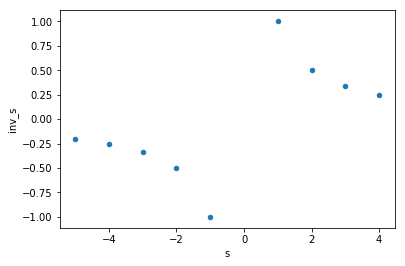

In [40]:
import matplotlib.pyplot as plt
import numpy as np

s = pd.Series(np.arange(-5,5))
print("Linear space with an inversion")
display(pd.DataFrame({"s": s, "inv_s": 1/s}).head())
display(pd.DataFrame({"s": s, "inv_s": 1/s}).tail())

%matplotlib inline

pd.DataFrame({"s": s, "inv_s": 1/s}).plot("s","inv_s",
                                         kind="scatter")

In [42]:
print("-> Check where 1/s is finite")
display((1/s)[(1/s).map(lambda x: np.isfinite(x))])

print("-> Check how many finite values we have")
display((1/s)[(1/s).map(lambda x: np.isfinite(x))].count())

print("-> Check where 1/s is finite")
display((1/s)[(1/s).map(lambda x: np.isinf(x))].count())

-> Check where 1/s is finite


0   -0.200000
1   -0.250000
2   -0.333333
3   -0.500000
4   -1.000000
6    1.000000
7    0.500000
8    0.333333
9    0.250000
dtype: float64

-> Check where 1/s is finite


9

-> Check where 1/s is finite


1

We have seen also pd.NaT value for timedeltas. We can deal with these values in the following way:

In [42]:
pd.isnull(pd.NaT)

True

In [43]:
print("-> With is null we can check the precence of any of these values")
pd.isnull(pd.Series([pd.NaT,np.nan,None]))

-> With is null we can check the precence of any of these values


0    True
1    True
2    True
dtype: bool

*(from [Pandas API Docs](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#values-considered-missing))*

One has to be careful that in python (and numpy), the nan's don’t compare with equal, but None's do. 

Note that Pandas/numpy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [9]:
None == None, np.nan == np.nan

(True, False)

In [48]:
print("-> check that we can't use == to compare NaNs")
s = pd.Series([None,np.nan])
print((s == None).sum())
print((s == np.nan).sum())
print((s.isnull()).sum())

-> check that we can't use == to compare NaNs
0
0
2


In general, when we are looking for errors, we may eventualy finish our process with a Boolan Series, which returns the position of the errors. For example if we want to constraint our variable to be non-negative:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262DCDCD748>]],
      dtype=object)

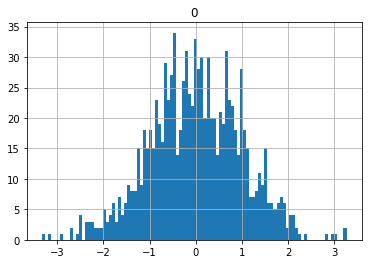

In [15]:
# imagine we have the following data
data = np.random.normal(0,1,1000)
pd.DataFrame(data).hist(bins=100)

We use a simple arithmetic operation vecotrized over the Series to find negative values

In [22]:
data<0

array([], dtype=float64)

Using this result, we can reasign an arbitrary value to negative data points this way

In [25]:
data[data<0] = 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262DD151080>]],
      dtype=object)

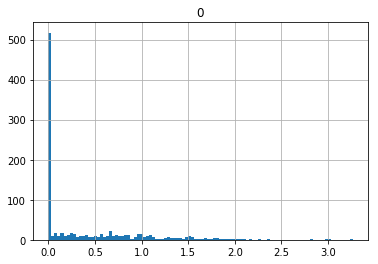

In [24]:
pd.DataFrame(data).hist(bins=100)

#### Boolean Operators any and all

There are two methods that can be applied over Boolean Series and DataFrames that are interesting for error detection:
* a.any(): returns a Boolean value, telling that there exists at least one True value in the Series
* a.all(): returns a Boolean value, telling that all values are True

Let's see an example to ilustrate:

In [28]:
df = pd.DataFrame(
    {
        "a" : np.random.normal(0,1, 100),
        "b" : np.random.normal(6,1, 100)
    }
)
df.head()

,a,b
0,1.018595,7.822393
1,-0.100459,6.329875
2,1.485587,4.836001
3,1.137467,4.756986
4,1.617072,6.315231


In [30]:
(df<0).any()

a     True
b    False
dtype: bool

In [32]:
(df<0).any(axis=1).head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [33]:
(df>0).all()

a    False
b     True
dtype: bool

## Outliers

There is a vast body of literature on outlier detection, and several definitions of
outlier exist. 

A general definition: an outlier in a data set as an observation (or set of observations) which appear to be inconsistent with that set of data. 

Note that:

* Outliers do not equal errors
* They should be detected, but not necessarily removed
* Their inclusion in the analysis is a statistical decision

Let's see an example (data taken from [here](http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html)):

In [54]:
import pandas as pd
#load data
hw_df = pd.read_csv("../data/heigths_weights_dummy.tsv",sep="\t",index_col=0)
#chek if there exist nulls
num_nulls = hw_df.isnull().any(axis=1).sum()
if num_nulls > 0:
    print("Warning: there are nulls")

hw_df.columns = ["height","weight"]
print("-> Original DF")
display(hw_df.head())
#convert to metric
hw_df["height"] = hw_df["height"] * 2.54
hw_df["weight"] = hw_df["weight"] * 0.453592

#summary statistics
display(hw_df.describe())

-> Original DF


,height,weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


,height,weight
count,33.000000,33.000000
mean,175.076991,63.547079
std,14.389248,28.916631
min,153.107034,35.386871
25%,170.476062,54.733677
50%,172.472731,58.841950
75%,176.272800,64.342071
max,246.768112,218.800216


We have a dataset with weights and heights of people. Using describe we can see that:
* height average is 175.07 cm
* weight average is 63.54 kg
    
However we have two (max) values (maybe not the same), that clearly overpass the mean: 246.76 and 218.80 respectively.

These values are considered outliers.

For more or less unimodal and symmetrically distributed data, Tukey's box-and-whisker
method for outlier detection is often appropriate. 

#### Tukey's box-and-whisker

In this method, an observation is an outlier when it is larger than the so-called "whiskers" of the set of observations. 

The upper whisker is computed by adding 1.5 times the interquartile range (IQR) to the third quartile and rounding to the nearest lower observation. 

The lower whisker is computed likewise.

All values above higher whisker and lower whisker are considered outliers

**What is the IQR?**

* Quantiles are cutpoints dividing the range of a probability distribution into contiguous intervals with equal probabilities
* A percentile (or a centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall
* The 25th percentile is also known as the first quartile (Q1), the 50th percentile as the median or second quartile (Q2), and the 75th percentile as the third quartile (Q3)
* In general, percentiles and quartiles are specific types of quantiles
* The IQR range is basically the rest between 3rd quartile and 1st quartile

In [67]:
#quantiles are proportional 4 divisions of the data
print("-> We can compute the quantiles easily with pandas.DataFrame.quantile()")
#note that the result is a DataFrame
display(hw_df.quantile([.25,.5,.75]))

#as stated, the IQR is de division between 1st and 3rd qauntiles
#this function will compute the rest
iqr_func = lambda x: x.iloc[1] - x.iloc[0] 

#note that we just select the 1st and 3rd quantiles
iqr = hw_df.quantile([.25,.75]).apply(iqr_func)
display("Our IQR is:", iqr)

# add iqr*1.5  to both quartiles
high_out = hw_df.quantile([.75]) + iqr*1.5 
low_out = hw_df.quantile([.25]) - iqr*1.5

print("-> high whiskers:")
display(high_out)
print("-> lower whiskers")
display(low_out)

-> We can compute the quantiles easily with pandas.DataFrame.quantile()


,height,weight
0.25,170.476062,54.733677
0.50,172.472731,58.841950
0.75,176.272800,64.342071


'Our IQR is:'

height    5.796737
weight    9.608394
dtype: float64

-> high whiskers:


,height,weight
0.75,184.967905,78.754662


-> lower whiskers


,height,weight
0.25,161.780957,40.321086


-> Find upper outliers:


,height,weight
Index,,
31,190.888112,35.386871
33,246.768112,54.733677


-> Find lower outliers:


,height,weight
Index,,
23,161.242121,44.407523
32,153.107034,77.529759


-> The boxplot show us whiskers and outliers


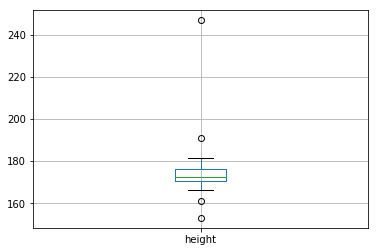

In [70]:
print("-> Find upper outliers:")
display(hw_df[hw_df["height"] > high_out.loc[0.75,"height"]])

print("-> Find lower outliers:")
display(hw_df[hw_df["height"] < low_out.loc[0.25,"height"]])

print("-> The boxplot show us whiskers and outliers")
hw_df.boxplot(column=["height"],return_type="axes")

            height      weight
Index                         
9       172.472731  218.800216
            height     weight
Index                        
31      190.888112  35.386871


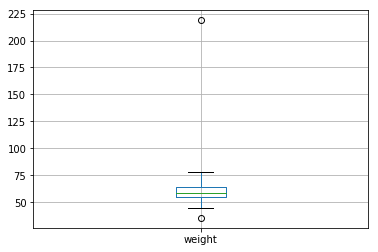

In [75]:
print(hw_df[hw_df["weight"] > high_out.loc[0.75,"weight"]])
print(hw_df[hw_df["weight"] < low_out.loc[0.25,"weight"]] )

hw_df.boxplot(column=["weight"],return_type="axes")

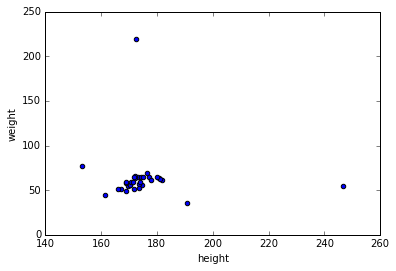

In [144]:
hw_df.plot(kind="scatter",x="height",y="weight")

### Types of Outliers

(*from https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#three*)

Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. 

The method to deal with them would then depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories:

* **Artificial (Error) / Non-natural**
* **Natural.**

Let’s understand various types of outliers in more detail:

* **Data Entry Errors:**- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data. For example: Annual income of a customer is <span>\$</span>100,000. Accidentally, the data entry operator puts an additional zero in the figure. Now the income becomes \$1,000,000 which is 10 times higher. Evidently, this will be the outlier value when compared with rest of the population.

* **Measurement Error:** It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty. For example: There are 10 weighing machines. 9 of them are correct, 1 is faulty. Weight measured by people on the faulty machine will be higher / lower than the rest of people in the group. The weights measured on faulty machine can lead to outliers.

* **Experimental Error:** Another cause of outliers is experimental error. For example: In a 100m sprint of 7 runners, one runner missed out on concentrating on the ‘Go’ call which caused him to start late. Hence, this caused the runner’s run time to be more than other runners. His total run time can be an outlier.

* **Intentional Outlier:** This is commonly found in self-reported measures that involves sensitive data. For example: Teens would typically under report the amount of alcohol that they consume. Only a fraction of them would report actual value. Here actual values might look like outliers because rest of the teens are under reporting the consumption.

* **Data Processing Error:** Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.

* **Sampling error:** For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.

* **Natural Outlier:** When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


It is also common to get rid of everithing higher than 95 percentile and lower than 5 percentile

.95 and .5 percentiles


0.05    164.228902
0.95    185.344425
Name: height, dtype: float64

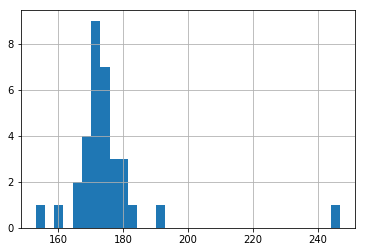

In [78]:
%matplotlib inline
#plot data with histograms
hw_df["height"].hist(bins=hw_df.shape[0])
print(".95 and .5 percentiles")
display(hw_df["height"].quantile([.05,.95]))

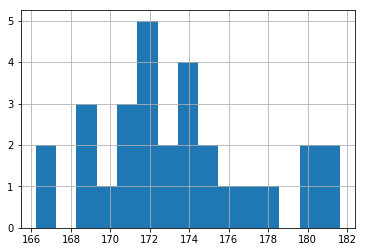

In [79]:
#save percentiles in vars
hl = hw_df["height"].quantile([.95])
ll = hw_df["height"].quantile([.05])
#filter and plot
hw_df["height"][(hw_df["height"] < hl.iloc[0]) & (hw_df["height"] > ll.iloc[0])].hist(bins=15)

0.05    47.246235
0.95    72.658970
Name: weight, dtype: float64

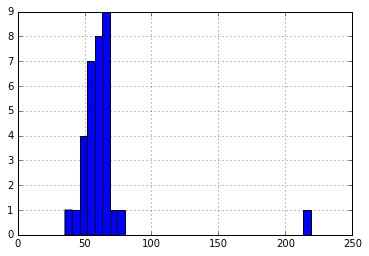

In [163]:
hw_df["weight"].hist(bins=hw_df.shape[0])
hw_df["weight"].quantile([.05,.95])

## Correction

### Simple transformation

We can transform data using data from two different dataset with same labels.

In the following dataset there's an error, and variable a has to be the double for observations labelled as b in variable b

In [88]:
print("-> Imagine that this dataset has errors")
df1 = pd.DataFrame({"a":[1,2,3,4,5],"b":["a","a","a","b","b"]})
display(df1)

print("-> This one has the correct value for values a and b")
s1 =pd.Series([1,2],index=["a","b"])
display(s1)

#match returns a series with the indexes with correct values in correct dataset
display(pd.match(df1.b,s1.index))
#we index the correct values in s1 using the result of the match operation
f = s1[pd.match(df1.b,s1.index)]
print("-> but we have a problem with indexes")
display(f)

print("-> we have a to reindex using the original index")
f.index = df1.index
display(f)

print("-> this technique is also useful for converting between diferent units")
display(df1.a * f)

-> Imagine that this dataset has errors


,a,b
0,1,a
1,2,a
2,3,a
3,4,b
4,5,b


-> This one has the correct value for values a and b


a    1
b    2
dtype: int64

C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.match() is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


array([0, 0, 0, 1, 1], dtype=int64)

-> but we have a problem with indexes


C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: pd.match() is deprecated and will be removed in a future version
  if sys.path[0] == '':


a    1
a    1
a    1
b    2
b    2
dtype: int64

-> we have a to reindex using the original index


0    1
1    1
2    1
3    2
4    2
dtype: int64

-> this technique is also useful for converting between diferent units


0     1
1     2
2     3
3     8
4    10
dtype: int64

You probably have seen that we have a message saying that pd.match is deprected

There exist other ways to do this operation, for example using join

In [100]:
df1 = pd.DataFrame({"a":[1,2,3,4,5],"b":["a","a","a","b","b"]})
s1 =pd.Series([1,2],index=["a","b"],name="correct")
print("-> Original DataFrame")
display(df1)
print("-> Correct Series")
display(s1)

#we have to reindex df1 so we can use both joins to merge the dataframe
#it is like a SQL join
df1.set_index("b").join(s1, how="inner")

-> Original DataFrame


,a,b
0,1,a
1,2,a
2,3,a
3,4,b
4,5,b


-> Correct Series


a    1
b    2
Name: correct, dtype: int64

,a,correct
a,1,1
a,2,1
a,3,1
b,4,2
b,5,2


This technique can be useful for example when dealing with different units in a same variable. It is also useful for imputation.

Imagine that in sacramento estate csv, somebody tells you that Residential houses the unit is in square meters, instead of square feet.

A fast technique for transforming this is using match.

In [105]:
df = pd.read_csv("../data/Sacramentorealestatetransactions.csv")

#we can create a dataframe with conversion factors this way
# 1. use a default scalar
# 2. as index use the list of unique labels
print("-> labels:")
display(df.type.unique())
#create the dataframe
conv = pd.Series([1],index=df.type.unique(),dtype=float)
# 3. assign the corrector factor to each label
conv["Residential"] = 0.092903

# we create a new variable which is the factor
conv[pd.match(df.type,conv.index)].sample(10)


-> labels:


array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

C:\Users\ip476832\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pd.match() is deprecated and will be removed in a future version
  


Residential    0.092903
Condo          1.000000
Residential    0.092903
Residential    0.092903
Residential    0.092903
Residential    0.092903
Residential    0.092903
Residential    0.092903
Residential    0.092903
Residential    0.092903
dtype: float64

In [30]:
# we assign it to a new variable
new_factor = conv[pd.match(df.type,conv.index)]
# reindex
new_factor.index = df.index

#then multiply
(df.sq__ft * new_factor).head()


0     77.666908
1    108.417801
2     73.950788
3     79.153356
4     74.043691
dtype: float64

Exercise: **Can you do the same with join?**

## Imputation

Imputation is the process of estimating or deriving values for fields where data is missing. 

There is a vast body of literature on imputation methods and it goes beyond the scope of this course to discuss all of them.

Here, we will use pandas to calculate values to impute and assign them to empty values.

In [111]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"a":[0.8,0.4,1.8,np.nan],
                   "b":[2.3,np.nan,np.nan,5.6],
                   "c":[2.4,3.2,1.1,4.5],
                   "d":[np.nan,4.4,1.8,np.nan],
                   "tag":["a","a","b","b"]})

print("-> Original DataFrame")
display(df)

print("-> Fill NaNs")
display(df.fillna(0))

-> Original DataFrame


,a,b,c,d,tag
0,0.8,2.3,2.4,NaN,a
1,0.4,NaN,3.2,4.4,a
2,1.8,NaN,1.1,1.8,b
3,NaN,5.6,4.5,NaN,b


-> Fill NaNs


,a,b,c,d,tag
0,0.8,2.3,2.4,0.0,a
1,0.4,0.0,3.2,4.4,a
2,1.8,0.0,1.1,1.8,b
3,0.0,5.6,4.5,0.0,b


A more drastic approach would be to get rid of these observations or variables that contain an nan.

In [114]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"a":[0.8,0.4,1.8,np.nan],
                   "b":[2.3,np.nan,np.nan,5.6],
                   "c":[2.4,3.2,1.1,4.5],
                   "d":[np.nan,4.4,1.8,np.nan],
                   "tag":["a","a","b","b"]})
print("-> Original DataFrame")
display(df)
print("-> Drop rows with nans")
display(df.dropna(axis=0))
print("-> Drop columns with nans")
display(df.dropna(axis=1))

-> Original DataFrame


,a,b,c,d,tag
0,0.8,2.3,2.4,NaN,a
1,0.4,NaN,3.2,4.4,a
2,1.8,NaN,1.1,1.8,b
3,NaN,5.6,4.5,NaN,b


-> Drop rows with nans


,a,b,c,d,tag


-> Drop columns with nans


,c,tag
0,2.4,a
1,3.2,a
2,1.1,b
3,4.5,b


### Basic Imputation Methods

The first is imputation of the mean:

$$ \hat{x}_i = \bar{x}$$
where the $\bar{x}$ is the imputation value and the mean is taken over the observed values. 

The usability of this model is limited since it obviously causes a bias in measures of spread, estimated from the sample after imputation. 

In principle one can use other measures of centrality. For example, imputation of the mean or median can be done as follows.

In [143]:
original_df = pd.DataFrame({"a":[0.8,0.4,1.8,np.nan],
                   "b":[2.3,np.nan,np.nan,5.6],
                   "c":[2.4,3.2,1.1,4.5],
                   "d":[np.nan,4.4,1.8,np.nan],
                   "tag":["a","a","b","b"]})

#to check where is a null
print("-> see which columns have nans")
nulls = original_df.isnull().sum(axis=1)
display(original_df[nulls == 1])

print("-> see which columns have nans")
display(original_df.isnull().sum())

print("-> see means")
display(original_df.mean())

#impute means

original_df.fillna(original_df.mean())[nulls == 1]

-> see which columns have nans


,a,b,c,d,tag
0,0.8,2.3,2.4,NaN,a
1,0.4,NaN,3.2,4.4,a
2,1.8,NaN,1.1,1.8,b


-> see which columns have nans


a      1
b      2
c      0
d      2
tag    0
dtype: int64

-> see means


a    1.00
b    3.95
c    2.80
d    3.10
dtype: float64

,a,b,c,d,tag
0,0.8,2.30,2.4,3.1,a
1,0.4,3.95,3.2,4.4,a
2,1.8,3.95,1.1,1.8,b


We have a dicotomic variable, why don't we provide the mean of the sex gender?

In [150]:
original_df.pivot_table(index="tag",values=["a","b","c","d"],aggfunc=np.mean)

,a,b,c,d
tag,,,,
a,0.6,2.3,2.8,4.4
b,1.8,5.6,2.8,1.8


How to fill it?

In [154]:
tag_means = original_df.pivot_table(index="tag",values=["a","b","c","d"],aggfunc=np.mean)

print("-> First imputation")
original_df.loc[(original_df.tag=="a") & (original_df.b.isnull()),"b"] = tag_means.loc["a","b"]
display(original_df[nulls == 1])

print("-> Second imputation")
original_df.loc[(original_df.tag=="a") & (original_df.d.isnull()),"d"] = tag_means.loc["a","d"]
display(original_df[nulls == 1])

-> First imputation


,a,b,c,d,tag
0,0.8,2.3,2.4,NaN,a
1,0.4,2.3,3.2,4.4,a
2,1.8,NaN,1.1,1.8,b


-> Second imputation


,a,b,c,d,tag
0,0.8,2.3,2.4,4.4,a
1,0.4,2.3,3.2,4.4,a
2,1.8,NaN,1.1,1.8,b
